In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch 
from math import sqrt
from statistics import mean

#Functions

In [2]:
def EuclideanDistance(a,b):
    '''
    returns the Euclidean Distance between two points

    parameters: list of two points containing their cordinates
    '''
    return sqrt(((np.array(a) -np.array(b))**2).sum())

def ManhattanDistance(a,b):
    '''
    returns the Manhattan Distance between two points

    parameters: list of two points containing their cordinates
    '''
    return abs(np.array(a) - np.array(b)).sum()

def SingleLinkage(a,b):
    '''
    Calculates the distance b/w each points of the two clusters passed as 
    parameters and Returns the Distance among the clusters according
    to the single linkage criteria
    '''

    #list of all the point to point distances b/w the two clusters
    dis = []

    for i in a:
        for j in b:
            d = EuclideanDistance(i,j) 
            dis.append(d)
    return min(dis)

def CompleteLinkage(a,b):
    '''
    Calculates the distance b/w each points of the two clusters passed as 
    parameters and Returns the Distance among the clusters according
    to the complete linakge criteria
    '''

    #list of all the point to point distances b/w the two clusters
    dis = []

    for i in a:
        for j in b:
            d = EuclideanDistance(i,j) 
            dis.append(d)
    return max(dis)

def AverageLinkage(a,b):
    '''
    Calculates the distance b/w each points of the two clusters passed as 
    parameters and Returns the Distance among the clusters according
    to the average linkage criteria
    '''

    #list of all the point to point distances b/w the two clusters
    dis = []

    for i in a:
        for j in b:
            d = EuclideanDistance(i,j) 
            dis.append(d)
    return mean(dis)



#Dataset

In [3]:
# Loading the data
df = pd.read_csv('customers.csv',usecols = [3,4])
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#Single Linkage

In [4]:
# Initialisation of the lists for keeping record of clusters and their corresponding co-ordinates
##Nested list since a cluster can have multiple points/elements

clusters = [[i] for i in df.index] 
points = [ [list(i)] for i in df.values] 


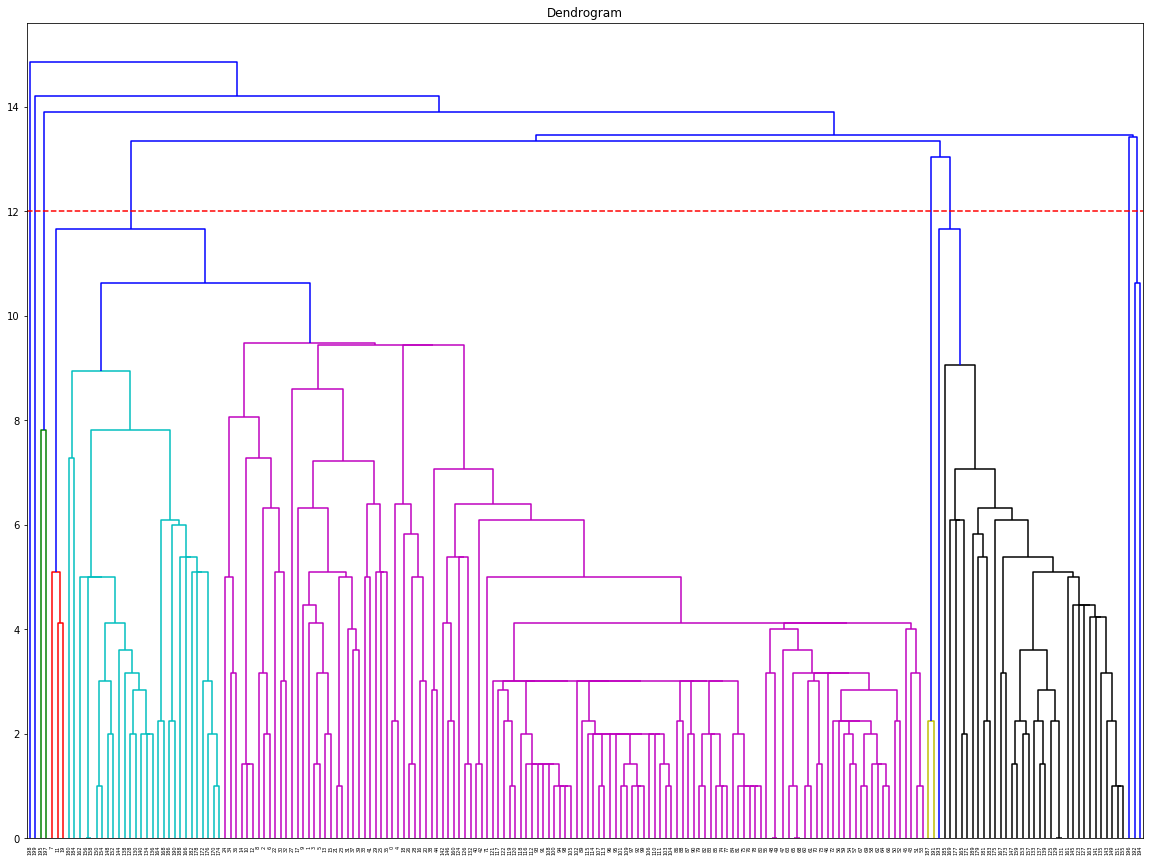

In [5]:
#Plotting Dendrogram

plt.figure(figsize=(20, 15))  
plt.title("Dendrogram")  
dendrogram = sch.dendrogram(sch.linkage(df.to_numpy(), method='single'))
plt.axhline(12,color ='red' , linestyle = '--')
plt.show()

In [6]:
#from the Dendrogram, the optimum no. of clusters = 8
n = 8

In [7]:
#Clustering

while len(clusters) > n:

    #Distance Matrix
    dm = np.zeros((len(clusters),len(clusters)))
    
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if i == j:
                dm[i][j] = 1000 
            else:
                dm[i][j] = SingleLinkage(points[i],points[j])
               
            

    m = dm.min()
    min_pt= np.where(dm == m) #array of indices of min distance points

    #contains the clusters to be merged 
    clus_to_merge = [clusters[i] for i in set(min_pt[0])]

    #New cluster formed after merging
    new_cluster = [ point for cluster in clus_to_merge for point in cluster]
    
    #contains the cordinates of the clusters to be merged
    pt_to_merge = [points[i] for i in set(min_pt[0])]

    #contains the cordinates of the new cluster
    new_point = [point for points in pt_to_merge for point in points]
    
    #adding new clusters and their cordinates
    clusters.append(new_cluster)
    points.append(new_point)

    #Removing the clusters which were merged
    for i in clus_to_merge:
        clusters.remove(i)   
    for i in pt_to_merge:
        points.remove(i)

   
    print(len(clusters),clusters)
    

193 [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [66], [67], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [130], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [157], [159], [160], [161], [162], [163], [164], [1

48 [[1], [7], [9], [11], [17], [18], [19], [22], [24], [25], [27], [29], [31], [33], [35], [41], [45], [71], [123], [124], [127], [141], [142], [145], [161], [162], [163], [166], [169], [175], [177], [178], [179], [180], [182], [184], [185], [188], [189], [192], [193], [194], [195], [196], [197], [198], [199], [37, 39, 8, 167, 173, 34, 36, 43, 46, 55, 121, 117, 44, 0, 4, 50, 52, 56, 72, 86, 88, 89, 122, 125, 133, 143, 146, 160, 164, 168, 181, 183, 186, 187, 190, 191, 2, 6, 13, 15, 59, 83, 84, 87, 90, 95, 96, 106, 110, 114, 115, 118, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171, 176, 3, 5, 10, 12, 14, 149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 63, 64, 66, 67, 69, 129, 65, 131, 68, 48, 49, 156, 158, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 111, 112, 116, 126, 132, 137, 139, 147, 159, 38, 16, 20, 30, 172, 32, 102, 135, 138, 47, 144]]
46 [[1], [

14 [[17], [27], [180], [184], [185], [192], [193], [194], [195], [196], [197], [198], [199], [18, 124, 166, 179, 188, 7, 22, 25, 29, 35, 178, 182, 9, 141, 1, 11, 19, 45, 31, 37, 39, 8, 167, 173, 34, 36, 43, 46, 55, 121, 117, 44, 0, 4, 50, 52, 56, 72, 86, 88, 89, 122, 125, 133, 143, 146, 160, 164, 168, 181, 183, 186, 187, 190, 191, 2, 6, 13, 15, 59, 83, 84, 87, 90, 95, 96, 106, 110, 114, 115, 118, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171, 176, 3, 5, 10, 12, 14, 149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 63, 64, 66, 67, 69, 129, 65, 131, 68, 48, 49, 156, 158, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 111, 112, 116, 126, 132, 137, 139, 147, 159, 38, 16, 20, 30, 172, 32, 102, 135, 138, 47, 144, 142, 163, 123, 127, 145, 24, 33, 41, 71, 161, 162, 189, 169, 175, 177]]
13 [[27], [180], [184], [185], [192], [193], [194], [195], [196], [197], [198]

In [8]:
#Labeling

#To map the category of each training example in dataset
label = np.zeros((len(df.index)),dtype=int)
category= 1

for cluster in clusters:
    for point in cluster:
        label[point] = category
    category+=1

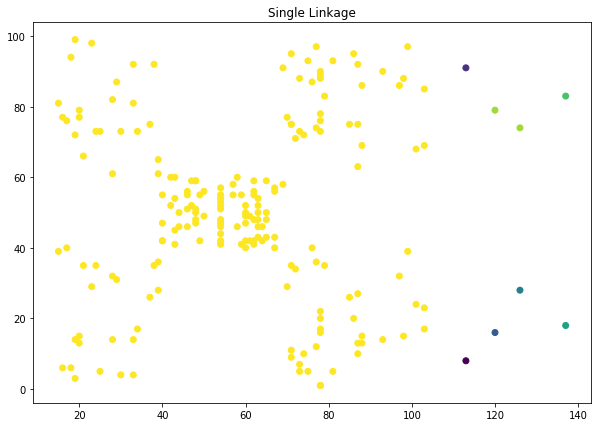

In [9]:
plt.figure(figsize=(10,7))
plt.title("Single Linkage")  
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label)
plt.show()

#Complete Linkage

In [10]:
# Initialisation of the lists for keeping record of clusters and their corresponding co-ordinates
##Nested list since a cluster can have multiple points/elements

clusters = [[i] for i in df.index] 
points = [ [list(i)] for i in df.values] 


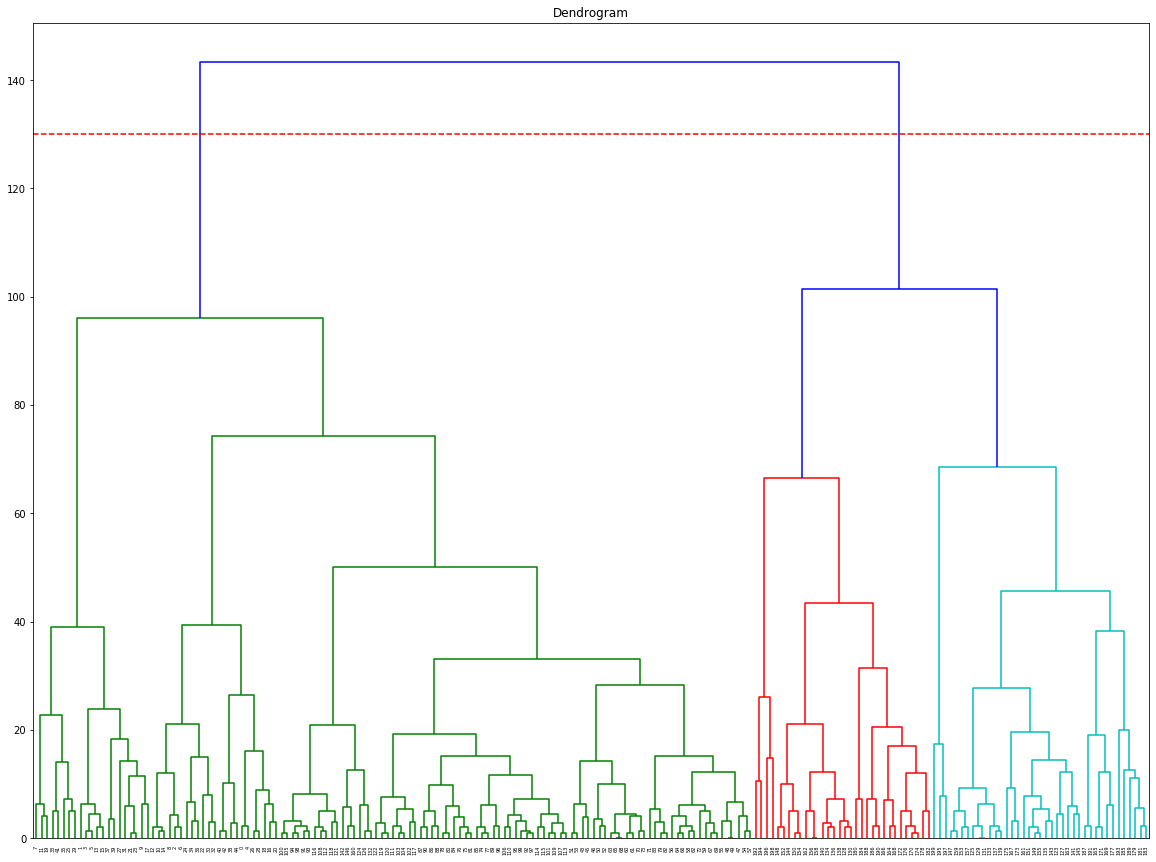

In [11]:
#Plotting dendrogram

plt.figure(figsize=(20, 15))  
plt.title("Dendrogram")  
dendrogram = sch.dendrogram(sch.linkage(df.to_numpy(), method='complete'))
plt.axhline(130,color ='red' , linestyle = '--')
plt.show()

In [12]:
#from the Dendrogram, the optimum no. of clusters = 2
n=2

In [13]:
#clustering

while len(clusters) > n:

    #Distance Matrix
    dm = np.zeros((len(clusters),len(clusters)))
    
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if i == j:
                dm[i][j] = 1000 
            else:
                dm[i][j] = CompleteLinkage(points[i],points[j])
               
            

    m = dm.min()
    min_pt= np.where(dm == m) #array of indices of min distance points

    #contains the clusters to be merged 
    clus_to_merge = [clusters[i] for i in set(min_pt[0])]

    #New cluster formed after merging
    new_cluster = [ point for cluster in clus_to_merge for point in cluster]
    
    #contains the cordinates of the clusters to be merged
    pt_to_merge = [points[i] for i in set(min_pt[0])]

    #contains the cordinates of the new cluster
    new_point = [point for points in pt_to_merge for point in points]
    
    #adding new clusters and their cordinates
    clusters.append(new_cluster)
    points.append(new_point)

    #Removing the clusters which were merged
    for i in clus_to_merge:
        clusters.remove(i)   
    for i in pt_to_merge:
        points.remove(i)

   
    print(len(clusters),clusters)
    

193 [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [66], [67], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [130], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [157], [159], [160], [161], [162], [163], [164], [1

73 [[1], [7], [8], [9], [11], [17], [18], [19], [22], [24], [25], [27], [29], [31], [33], [35], [41], [43], [45], [46], [47], [55], [56], [59], [63], [71], [72], [83], [84], [95], [122], [123], [124], [125], [127], [133], [141], [142], [145], [161], [162], [163], [166], [169], [172], [175], [176], [177], [178], [179], [180], [182], [184], [185], [188], [189], [192], [193], [194], [195], [196], [197], [198], [199], [129, 65, 131, 68, 48, 49, 156, 158], [149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120], [3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159], [2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [44, 38], [16, 102, 117, 118, 20, 121, 30, 32], [135, 143,

52 [[1], [7], [18], [24], [27], [31], [46], [47], [55], [63], [72], [84], [95], [122], [124], [142], [161], [162], [163], [166], [175], [179], [180], [184], [185], [188], [189], [192], [193], [194], [195], [196], [197], [198], [199], [129, 65, 131, 68, 48, 49, 156, 158], [149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120], [3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159], [2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [44, 38], [16, 102, 117, 118, 20, 121, 30, 32], [135, 143, 34, 36, 167, 173], [37, 39, 138, 144], [43, 45], [11, 19], [141, 145, 56, 59, 123, 127], [33, 41], [172, 176, 178, 182, 25, 29, 35], [83, 71], [169, 177], [8, 9, 17, 22, 125, 133]]
49

39 [[1], [18], [24], [27], [31], [124], [142], [162], [166], [185], [188], [189], [193], [196], [198], [199], [129, 65, 131, 68, 48, 49, 156, 158], [149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120], [3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159], [2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [44, 38], [16, 102, 117, 118, 20, 121, 30, 32], [135, 143, 34, 36, 167, 173], [37, 39, 138, 144], [141, 145, 56, 59, 123, 127], [33, 41], [172, 176, 178, 182, 25, 29, 35], [169, 177], [8, 9, 17, 22, 125, 133], [7, 11, 19, 175, 179], [47, 55], [83, 71, 72], [180, 184, 63, 84], [195, 197], [43, 45, 46], [161, 163], [194, 192], [95, 122]]
38 [[1], [18], [24], [27], [

28 [[1], [129, 65, 131, 68, 48, 49, 156, 158], [149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120], [3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159], [2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [44, 38], [16, 102, 117, 118, 20, 121, 30, 32], [135, 143, 34, 36, 167, 173], [37, 39, 138, 144], [141, 145, 56, 59, 123, 127], [33, 41], [172, 176, 178, 182, 25, 29, 35], [169, 177], [8, 9, 17, 22, 125, 133], [7, 11, 19, 175, 179], [180, 184, 63, 84], [43, 45, 46], [161, 163], [95, 122], [27, 31], [124, 142], [47, 55, 83, 71, 72], [198, 196], [189, 193, 185], [18, 24, 162, 166], [188, 194, 192], [199, 195, 197]]
27 [[1], [129, 65, 131, 68, 48, 49, 156, 158], [14

19 [[129, 65, 131, 68, 48, 49, 156, 158], [149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120], [3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159], [2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [16, 102, 117, 118, 20, 121, 30, 32], [135, 143, 34, 36, 167, 173], [37, 39, 138, 144], [141, 145, 56, 59, 123, 127], [172, 176, 178, 182, 25, 29, 35], [8, 9, 17, 22, 125, 133], [7, 11, 19, 175, 179], [18, 24, 162, 166], [199, 195, 197], [47, 55, 83, 71, 72, 44, 38], [188, 194, 192, 198, 196], [43, 45, 46, 27, 31, 1, 33, 41], [169, 177, 161, 163, 189, 193, 185], [124, 142, 95, 122, 180, 184, 63, 84]]
18 [[129, 65, 131, 68, 48, 49, 156, 158], [149, 150, 151, 154, 21, 1

10 [[3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159], [2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [8, 9, 17, 22, 125, 133], [188, 194, 192, 198, 196], [199, 195, 197, 169, 177, 161, 163, 189, 193, 185], [7, 11, 19, 175, 179, 43, 45, 46, 27, 31, 1, 33, 41, 141, 145, 56, 59, 123, 127], [149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120, 37, 39, 138, 144], [129, 65, 131, 68, 48, 49, 156, 158, 124, 142, 95, 122, 180, 184, 63, 84, 18, 24, 162, 166, 16, 102, 117, 118, 20, 121, 30, 32, 47, 55, 83, 71, 72, 44, 38], [135, 143, 34, 36, 167, 173, 172, 176, 178, 182, 25, 29, 35]]
9 [[2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 

In [14]:
#Labeling

#To map the category of each training example in dataset
label = np.zeros((len(df.index)),dtype=int)
category= 1

for cluster in clusters:
    for point in cluster:
        label[point] = category
    category+=1

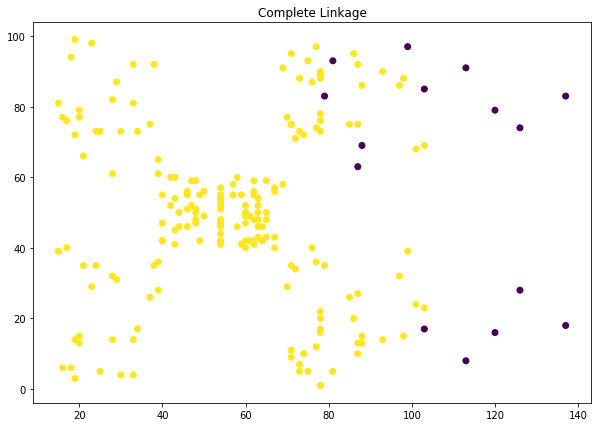

In [15]:
plt.figure(figsize=(10,7))
plt.title("Complete Linkage")  
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label)
plt.show()

#Average Linkage

In [16]:
# Initialisation of the lists for keeping record of clusters and their corresponding co-ordinates
##Nested list since a cluster can have multiple points/elements

clusters = [[i] for i in df.index] 
points = [ [list(i)] for i in df.values] 


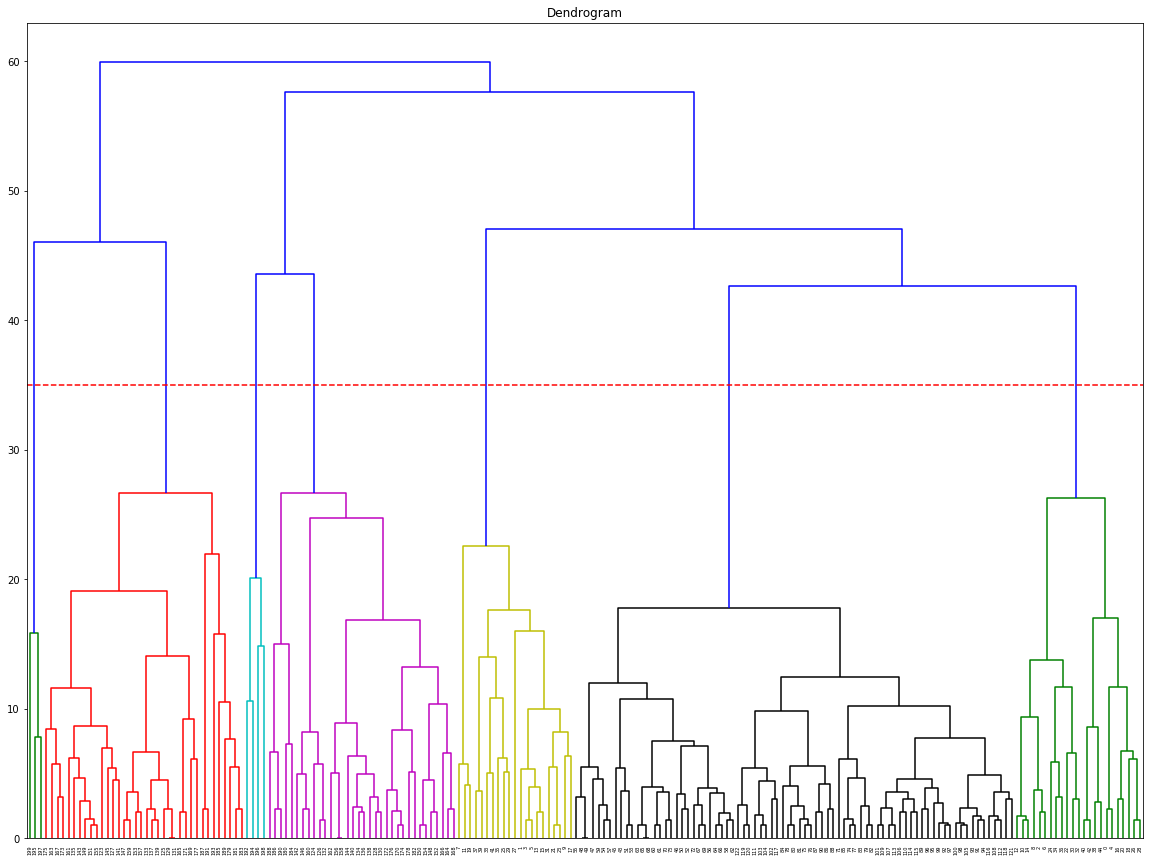

In [17]:
#Plotting dendrogram

plt.figure(figsize=(20, 15))  
plt.title("Dendrogram")  
dendrogram = sch.dendrogram(sch.linkage(df.to_numpy(), method='average'))
plt.axhline(35,color ='red' , linestyle = '--')
plt.show()

In [18]:
#from the Dendrogram, the optimum no. of clusters = 7
n = 7


In [19]:
#clustering

while len(clusters) > n:

    #Distance Matrix
    dm = np.zeros((len(clusters),len(clusters)))
    
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if i == j:
                dm[i][j] = 1000 
            else:
                dm[i][j] = AverageLinkage(points[i],points[j])
               
            

    m = dm.min()
    min_pt= np.where(dm == m) #array of indices of min distance points

    #contains the clusters to be merged 
    clus_to_merge = [clusters[i] for i in set(min_pt[0])]

    #New cluster formed after merging
    new_cluster = [ point for cluster in clus_to_merge for point in cluster]
    
    #contains the cordinates of the clusters to be merged
    pt_to_merge = [points[i] for i in set(min_pt[0])]

    #contains the cordinates of the new cluster
    new_point = [point for points in pt_to_merge for point in points]
    
    #adding new clusters and their cordinates
    clusters.append(new_cluster)
    points.append(new_point)

    #Removing the clusters which were merged
    for i in clus_to_merge:
        clusters.remove(i)   
    for i in pt_to_merge:
        points.remove(i)

   
    print(len(clusters),clusters)
    

193 [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [66], [67], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [130], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [157], [159], [160], [161], [162], [163], [164], [1

73 [[1], [7], [8], [9], [11], [17], [18], [19], [22], [24], [25], [27], [29], [31], [33], [35], [41], [43], [45], [46], [47], [55], [56], [59], [63], [71], [72], [83], [84], [95], [122], [123], [124], [125], [127], [133], [141], [142], [145], [161], [162], [163], [166], [169], [172], [175], [176], [177], [178], [179], [180], [182], [184], [185], [188], [189], [192], [193], [194], [195], [196], [197], [198], [199], [129, 65, 131, 68, 48, 49, 156, 158], [149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120], [3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159], [2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [44, 38], [16, 102, 117, 118, 20, 121, 30, 32], [135, 143,

56 [[1], [8], [9], [17], [18], [22], [24], [27], [31], [46], [47], [55], [63], [72], [84], [95], [122], [124], [125], [133], [142], [161], [162], [163], [166], [175], [179], [180], [184], [185], [188], [189], [192], [193], [194], [195], [196], [197], [198], [199], [129, 65, 131, 68, 48, 49, 156, 158], [149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120], [3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159], [2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [44, 38], [16, 102, 117, 118, 20, 121, 30, 32], [135, 143, 34, 36, 167, 173], [37, 39, 138, 144], [43, 45], [141, 145, 56, 59, 123, 127], [33, 41], [172, 176, 178, 182, 25, 29, 35], [83, 71], [7, 11, 19], [169, 

41 [[1], [18], [24], [27], [31], [95], [122], [124], [142], [162], [166], [185], [188], [189], [192], [193], [194], [196], [198], [199], [129, 65, 131, 68, 48, 49, 156, 158], [149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120], [3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159], [2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [44, 38], [16, 102, 117, 118, 20, 121, 30, 32], [135, 143, 34, 36, 167, 173], [37, 39, 138, 144], [141, 145, 56, 59, 123, 127], [33, 41], [172, 176, 178, 182, 25, 29, 35], [7, 11, 19], [169, 177], [8, 9, 17, 22, 125, 133], [175, 179], [180, 184, 63, 84], [195, 197], [43, 45, 46], [161, 163], [47, 55, 83, 71, 72]]
40 [[1], [18], [24], [27

32 [[1], [18], [24], [162], [166], [188], [199], [129, 65, 131, 68, 48, 49, 156, 158], [149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120], [3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159], [2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [44, 38], [16, 102, 117, 118, 20, 121, 30, 32], [135, 143, 34, 36, 167, 173], [37, 39, 138, 144], [141, 145, 56, 59, 123, 127], [33, 41], [172, 176, 178, 182, 25, 29, 35], [7, 11, 19], [169, 177], [8, 9, 17, 22, 125, 133], [180, 184, 63, 84], [195, 197], [47, 55, 83, 71, 72], [194, 192], [95, 122], [161, 163, 175, 179], [124, 142], [185, 189, 193], [198, 196], [31, 27, 43, 45, 46]]
31 [[1], [24], [162], [166], [188], [199],

23 [[129, 65, 131, 68, 48, 49, 156, 158], [3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159], [2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [16, 102, 117, 118, 20, 121, 30, 32], [135, 143, 34, 36, 167, 173], [37, 39, 138, 144], [141, 145, 56, 59, 123, 127], [172, 176, 178, 182, 25, 29, 35], [169, 177], [8, 9, 17, 22, 125, 133], [180, 184, 63, 84], [161, 163, 175, 179], [124, 142], [185, 189, 193], [198, 196], [31, 27, 43, 45, 46], [188, 194, 192], [162, 166], [199, 195, 197], [18, 44, 38, 24], [1, 33, 41, 7, 11, 19], [47, 55, 83, 71, 72, 149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120, 95, 122]]
22 [[129, 65, 131, 68, 48, 49, 156, 158], [3, 5, 10, 12, 14,

14 [[2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 148, 152, 153, 157, 165, 171], [0, 50, 4, 52, 146, 160, 164, 168, 86, 88, 89, 96, 181, 183, 186, 187, 190, 191], [135, 143, 34, 36, 167, 173], [37, 39, 138, 144], [141, 145, 56, 59, 123, 127], [172, 176, 178, 182, 25, 29, 35], [8, 9, 17, 22, 125, 133], [199, 195, 197], [1, 33, 41, 7, 11, 19], [198, 196, 188, 194, 192], [169, 177, 161, 163, 175, 179, 185, 189, 193], [18, 44, 38, 24, 16, 102, 117, 118, 20, 121, 30, 32], [129, 65, 131, 68, 48, 49, 156, 158, 3, 5, 10, 12, 14, 26, 28, 40, 42, 54, 57, 58, 62, 70, 73, 91, 93, 108, 112, 116, 126, 132, 137, 139, 147, 159, 31, 27, 43, 45, 46, 47, 55, 83, 71, 72, 149, 150, 151, 154, 21, 155, 23, 170, 174, 51, 53, 60, 61, 64, 66, 67, 69, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85, 92, 94, 97, 98, 99, 100, 101, 103, 104, 105, 107, 109, 113, 119, 120, 95, 122], [124, 142, 162, 166, 180, 184, 63, 84]]
13 [[2, 6, 13, 15, 87, 90, 106, 110, 111, 114, 115, 128, 130, 134, 136, 140, 1

In [20]:
#Labeling

#To map the category of each training example in dataset
label = np.zeros((len(df.index)),dtype=int)
category= 1

for cluster in clusters:
    for point in cluster:
        label[point] = category
    category+=1

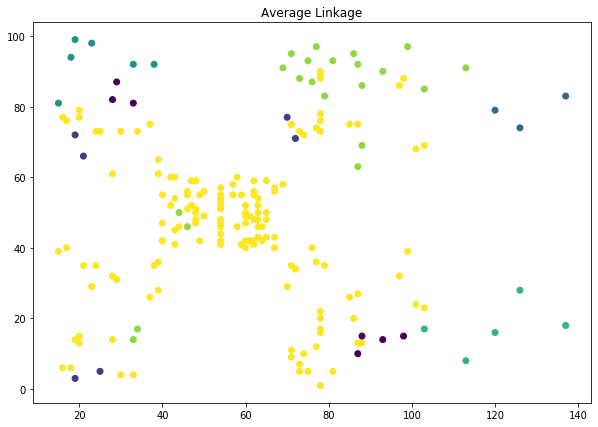

In [21]:
plt.figure(figsize=(10,7))
plt.title("Average Linkage")  
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label)
plt.show()

#Ward Linkage

In [22]:
from sklearn.cluster import AgglomerativeClustering

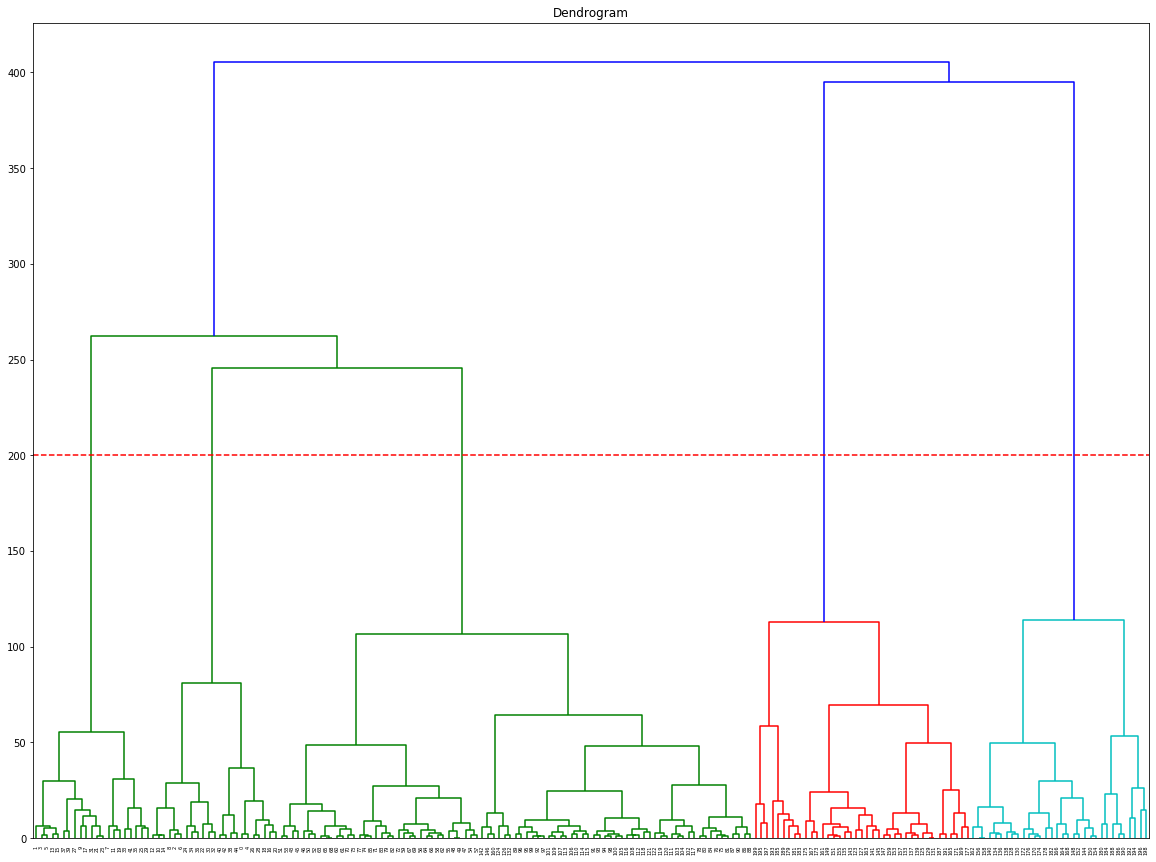

In [23]:
#Plotting dendrogram

plt.figure(figsize=(20, 15))  
plt.title("Dendrogram")  
dendrogram = sch.dendrogram(sch.linkage(df.to_numpy(), method='ward'))
plt.axhline(200,color ='red' , linestyle = '--')
plt.show()

In [24]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(df.to_numpy())
label = model.labels_

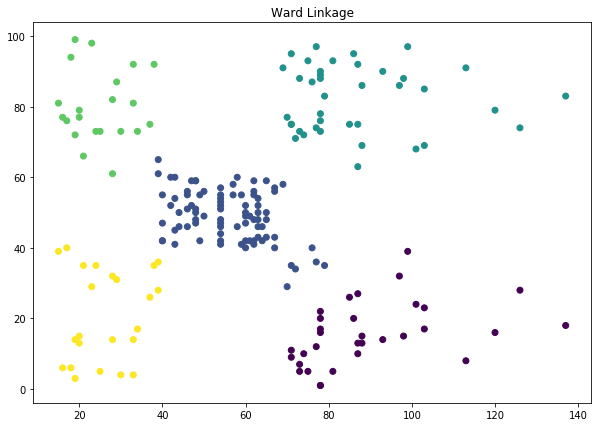

In [25]:
plt.figure(figsize=(10,7))
plt.title("Ward Linkage")  
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label)
plt.show()